# *通过房屋面积和卧室数量预测房价*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [3]:
path = 'ex1data2.txt'
data = pd.read_csv(path, header=None, names=['size', 'bedrooms', 'price'])
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# 特征放缩

In [37]:
data = (data - data.mean()) / data.std()
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


# 梯度下降法


## 定义函数

In [59]:
def cost_func(X, Y, theta, m):
    return np.sum(np.power(X * theta  - Y, 2)) / (2 * m)

def batch_gradient_decent(X, Y, theta, m, alpha=0.01, num_of_iters=1000):
    #获取参数数量
    num_of_parameters = theta.shape[0]
    #保存损失函数值
    cost_list = [int(1e9 + 7)]
    #用于保存theta的临时向量
    theta_tmp = theta.copy()
    for i in range(num_of_iters):
        bias = X * theta - Y
        for j in range(num_of_parameters):
            theta_tmp[j, 0] = theta[j, 0] - (alpha / m) * np.sum(np.multiply(bias, X[:, j]))
        theta = theta_tmp
        cost_val = np.sum(np.power(bias, 2)) / (2 * m)

        cost_list.append(cost_val)
    cost_list.append(cost_func(X, Y, theta, rows))
    return theta, cost_list[1:]

## 处理输入输出

In [65]:
rows = data.shape[0]
cols = data.shape[1]
rows, cols

(47, 3)

In [41]:
X = np.mat(np.ones((rows, cols), dtype='float64'))
X[:5, :]

matrix([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [42]:
X[:, 1:] = data.iloc[:, :cols-1].values
X[:5, :]

matrix([[ 1.        ,  0.13000987, -0.22367519],
        [ 1.        , -0.50418984, -0.22367519],
        [ 1.        ,  0.50247636, -0.22367519],
        [ 1.        , -0.73572306, -1.53776691],
        [ 1.        ,  1.25747602,  1.09041654]])

In [43]:
Y = np.mat(data.iloc[:, cols - 1].values).T
Y[:5, :]

matrix([[ 0.47574687],
        [-0.08407444],
        [ 0.22862575],
        [-0.86702453],
        [ 1.59538948]])

# 设置初始参数

In [73]:
theta = np.mat([0., 0., 0.]).T
theta
cost_func(X, Y, theta, rows)

0.48936170212765967

# 训练

In [74]:
theta, cost_values = batch_gradient_decent(X, Y,theta, rows)
len(cost_values), cost_func(X, Y, theta, rows)

(1001, 0.13070336960771892)

# 查看训练过程

Text(0.5, 1.0, 'error vs. training epoch')

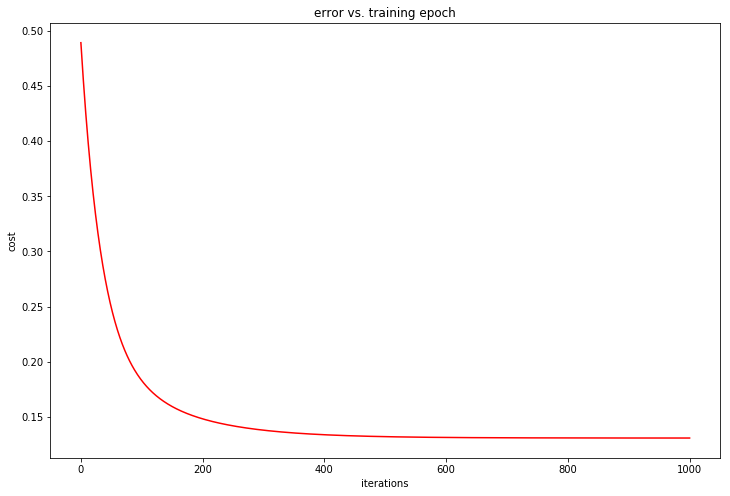

In [75]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(len(cost_values)), cost_values, 'r')
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax.set_title('error vs. training epoch')

# 正规方程法

In [77]:
def normal_eqn(X, Y):
    theta = np.linalg.inv(X.T * X) * X.T * Y
    return theta
normal_eqn(X, Y)

matrix([[-1.04083409e-16],
        [ 8.84765988e-01],
        [-5.31788197e-02]])